In [1]:
import os
import time

import yfinance as yf
from yahoo_fin.stock_info import *

from progressbar import progressbar




%matplotlib inline

C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [62]:
get_top_crypto()

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,46886.500000,-1693.55,-3.49,8.863160e+11,3.143000e+10,3.143000e+10,3.143000e+10,1.8903e+07
1,ETH-USD,Ethereum USD,3896.730000,-192.45,-4.71,4.628460e+11,2.141200e+10,2.141200e+10,2.141200e+10,1.18778e+08
2,BNB-USD,BinanceCoin USD,527.180000,-13.86,-2.56,8.793400e+10,1.789000e+09,1.789000e+09,1.789000e+09,1.66801e+08
3,USDT-USD,Tether USD,1.000900,+0.0006,0.06,7.637700e+10,6.737600e+10,6.737600e+10,6.737600e+10,7.6311e+10
4,SOL1-USD,Solana USD,178.160000,-6.61,-3.58,5.486000e+10,2.827000e+09,2.827000e+09,2.827000e+09,3.07925e+08
...,...,...,...,...,...,...,...,...,...,...
95,SUSHI-USD,Sushi USD,5.570300,-0.5381,-8.81,7.087840e+08,2.025200e+08,2.025200e+08,2.025200e+08,1.27244e+08
96,GNO-USD,Gnosis USD,453.860000,-12.64,-2.71,6.828750e+08,6.459000e+06,6.459000e+06,6.459000e+06,1.505e+06
97,ZRX-USD,0x USD,0.768397,-0.040416,-5.00,6.512130e+08,4.719000e+07,4.719000e+07,4.719000e+07,8.47496e+08
98,XWC-USD,WhiteCoin USD,0.841583,+0.031927,3.94,6.263070e+08,1.054700e+07,1.054700e+07,1.054700e+07,7.44201e+08


In [8]:


def get_tickers():
    
    # Automatische check toevoegen om te zien of de ticker al in de lijst staat.
    top100 = get_top_crypto()
    
    return list(top100['Symbol'])
    
def filter_tickers(tickers, filter_list):
    
    filtered_tickers = tickers
    
    for item in filter_list:
        try:
            filtered_tickers.remove(item)
        except: 
            pass 
    
    return filtered_tickers


def save_price_data(path, ticker, interval, start, end):

    data = yf.download(ticker, interval=interval, start=start, end=end)
    
    data.to_csv(f"{path}/{ticker}.csv")
    

def download_tickers(path, tickers, interval='1wk', start="2017-01-01", end="2021-12-01"):
    ''' Downloads all ticker data op the top 100 crypto currencies and saves them in specified directory
    
    params
    
        path: string - Directory where the data is stored
        tickers: list - List of top 100 tickers
        interval: string - Interval at which the data is fetched
        start: string - Start date (yyyy-mm-dd)
        end: string - End date (yyyy-mm-dd)
    
    
    '''
    
    for ticker in progressbar(tickers):
        location = f'{path}/{ticker}.csv'
        if os.path.isfile(location):
            pass
        else:
            time.sleep(10)
            try:
                save_price_data(path, ticker, interval, start, end)
            except Exception as e:
#                 print(e)
                print(f'{ticker} is unavailable')
        


In [9]:
filter_list = [
    'DOGE-USD', 'USDT-USD', 'USDC-USD', 'SHIB-USD', 'WBTC',
    'BUSD-USD', 'UST-USD', 'DAI-USD', 'TUSD'
]

path = 'data/1wk'

tickers_raw = get_tickers()
tickers = filter_tickers(tickers_raw, filter_list)
download_tickers(path, tickers)


N/A% (0 of 96) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

[*********************100%***********************]  1 of 1 completed

  1% (1 of 96) |                         | Elapsed Time: 0:00:10 ETA:   0:16:12


[*********************100%***********************]  1 of 1 completed

  2% (2 of 96) |                         | Elapsed Time: 0:00:20 ETA:   0:16:03


[*********************100%***********************]  1 of 1 completed

  3% (3 of 96) |                         | Elapsed Time: 0:00:30 ETA:   0:15:57


[*********************100%***********************]  1 of 1 completed

  4% (4 of 96) |#                        | Elapsed Time: 0:00:41 ETA:   0:15:39


[*********************100%***********************]  1 of 1 completed

  5% (5 of 96) |#                        | Elapsed Time: 0:00:51 ETA:   0:15:30


[*********************100%***********************]  1 of 1 completed

  6% (6 of 96) |#                        | Elapsed Time: 0:01:01 ETA:   0:15:20


[*********************100%***********************]  1 of 1 completed

  7% (7 of 96) |#                        | Elapsed Time: 0:01:11 ETA:   0:15:11


[*********************100%***********************]  1 of 1 completed

  8% (8 of 96) |##                       | Elapsed Time: 0:01:21 ETA:   0:14:59


[*********************100%***********************]  1 of 1 completed

  9% (9 of 96) |##                       | Elapsed Time: 0:01:32 ETA:   0:14:46


[*********************100%***********************]  1 of 1 completed

 10% (10 of 96) |##                      | Elapsed Time: 0:01:42 ETA:   0:14:37


[*********************100%***********************]  1 of 1 completed

 11% (11 of 96) |##                      | Elapsed Time: 0:01:52 ETA:   0:14:32


[*********************100%***********************]  1 of 1 completed

 12% (12 of 96) |###                     | Elapsed Time: 0:02:02 ETA:   0:14:16


[*********************100%***********************]  1 of 1 completed

 13% (13 of 96) |###                     | Elapsed Time: 0:02:13 ETA:   0:14:10


[*********************100%***********************]  1 of 1 completed

 14% (14 of 96) |###                     | Elapsed Time: 0:02:23 ETA:   0:13:55


[*********************100%***********************]  1 of 1 completed

 15% (15 of 96) |###                     | Elapsed Time: 0:02:33 ETA:   0:13:50


[*********************100%***********************]  1 of 1 completed

 16% (16 of 96) |####                    | Elapsed Time: 0:02:43 ETA:   0:13:38


[*********************100%***********************]  1 of 1 completed

 17% (17 of 96) |####                    | Elapsed Time: 0:02:53 ETA:   0:13:27


[*********************100%***********************]  1 of 1 completed

 18% (18 of 96) |####                    | Elapsed Time: 0:03:04 ETA:   0:13:21


[*********************100%***********************]  1 of 1 completed

 19% (19 of 96) |####                    | Elapsed Time: 0:03:14 ETA:   0:13:06


[*********************100%***********************]  1 of 1 completed

 20% (20 of 96) |#####                   | Elapsed Time: 0:03:24 ETA:   0:12:59


[*********************100%***********************]  1 of 1 completed

 21% (21 of 96) |#####                   | Elapsed Time: 0:03:34 ETA:   0:12:45


[*********************100%***********************]  1 of 1 completed

 22% (22 of 96) |#####                   | Elapsed Time: 0:03:45 ETA:   0:12:36


[*********************100%***********************]  1 of 1 completed

 23% (23 of 96) |#####                   | Elapsed Time: 0:03:55 ETA:   0:12:25


[*********************100%***********************]  1 of 1 completed

 25% (24 of 96) |######                  | Elapsed Time: 0:04:05 ETA:   0:12:15


[*********************100%***********************]  1 of 1 completed

 26% (25 of 96) |######                  | Elapsed Time: 0:04:15 ETA:   0:12:03


[*********************100%***********************]  1 of 1 completed

 27% (26 of 96) |######                  | Elapsed Time: 0:04:25 ETA:   0:11:54


[*********************100%***********************]  1 of 1 completed

 28% (27 of 96) |######                  | Elapsed Time: 0:04:36 ETA:   0:11:43


[*********************100%***********************]  1 of 1 completed

 29% (28 of 96) |#######                 | Elapsed Time: 0:04:46 ETA:   0:11:34


[*********************100%***********************]  1 of 1 completed

 30% (29 of 96) |#######                 | Elapsed Time: 0:04:56 ETA:   0:11:23


[*********************100%***********************]  1 of 1 completed

 31% (30 of 96) |#######                 | Elapsed Time: 0:05:06 ETA:   0:11:16


[*********************100%***********************]  1 of 1 completed

 32% (31 of 96) |#######                 | Elapsed Time: 0:05:16 ETA:   0:11:04


[*********************100%***********************]  1 of 1 completed

 33% (32 of 96) |########                | Elapsed Time: 0:05:27 ETA:   0:10:54


[*********************100%***********************]  1 of 1 completed

 34% (33 of 96) |########                | Elapsed Time: 0:05:37 ETA:   0:10:44


[*********************100%***********************]  1 of 1 completed

 35% (34 of 96) |########                | Elapsed Time: 0:05:47 ETA:   0:10:31


[*********************100%***********************]  1 of 1 completed

 36% (35 of 96) |########                | Elapsed Time: 0:05:57 ETA:   0:10:22


[*********************100%***********************]  1 of 1 completed

 37% (36 of 96) |#########               | Elapsed Time: 0:06:08 ETA:   0:10:13


[*********************100%***********************]  1 of 1 completed

 38% (37 of 96) |#########               | Elapsed Time: 0:06:18 ETA:   0:10:04


[*********************100%***********************]  1 of 1 completed

 39% (38 of 96) |#########               | Elapsed Time: 0:06:28 ETA:   0:09:53


[*********************100%***********************]  1 of 1 completed

 40% (39 of 96) |#########               | Elapsed Time: 0:06:38 ETA:   0:09:52


[*********************100%***********************]  1 of 1 completed

 41% (40 of 96) |##########              | Elapsed Time: 0:06:49 ETA:   0:09:32


[*********************100%***********************]  1 of 1 completed

 42% (41 of 96) |##########              | Elapsed Time: 0:06:59 ETA:   0:09:21


[*********************100%***********************]  1 of 1 completed

 43% (42 of 96) |##########              | Elapsed Time: 0:07:09 ETA:   0:09:10


[*********************100%***********************]  1 of 1 completed

 44% (43 of 96) |##########              | Elapsed Time: 0:07:19 ETA:   0:09:01


[*********************100%***********************]  1 of 1 completed

 45% (44 of 96) |###########             | Elapsed Time: 0:07:30 ETA:   0:08:51


[*********************100%***********************]  1 of 1 completed

 46% (45 of 96) |###########             | Elapsed Time: 0:07:40 ETA:   0:08:43


[*********************100%***********************]  1 of 1 completed

 47% (46 of 96) |###########             | Elapsed Time: 0:07:50 ETA:   0:08:32


[*********************100%***********************]  1 of 1 completed

 48% (47 of 96) |###########             | Elapsed Time: 0:08:00 ETA:   0:08:23


[*********************100%***********************]  1 of 1 completed

 50% (48 of 96) |############            | Elapsed Time: 0:08:11 ETA:   0:08:10


[*********************100%***********************]  1 of 1 completed

 51% (49 of 96) |############            | Elapsed Time: 0:08:21 ETA:   0:07:59


[*********************100%***********************]  1 of 1 completed

 52% (50 of 96) |############            | Elapsed Time: 0:08:31 ETA:   0:07:49


[*********************100%***********************]  1 of 1 completed

 53% (51 of 96) |############            | Elapsed Time: 0:08:41 ETA:   0:07:42


[*********************100%***********************]  1 of 1 completed

 54% (52 of 96) |#############           | Elapsed Time: 0:08:51 ETA:   0:07:28


[*********************100%***********************]  1 of 1 completed

 55% (53 of 96) |#############           | Elapsed Time: 0:09:03 ETA:   0:08:14


[*********************100%***********************]  1 of 1 completed

 56% (54 of 96) |#############           | Elapsed Time: 0:09:13 ETA:   0:07:09


[*********************100%***********************]  1 of 1 completed

 57% (55 of 96) |#############           | Elapsed Time: 0:09:23 ETA:   0:06:57


[*********************100%***********************]  1 of 1 completed

 58% (56 of 96) |##############          | Elapsed Time: 0:09:34 ETA:   0:06:47


[*********************100%***********************]  1 of 1 completed

 59% (57 of 96) |##############          | Elapsed Time: 0:09:44 ETA:   0:06:39


[*********************100%***********************]  1 of 1 completed

 60% (58 of 96) |##############          | Elapsed Time: 0:09:54 ETA:   0:06:29


[*********************100%***********************]  1 of 1 completed

 61% (59 of 96) |##############          | Elapsed Time: 0:10:04 ETA:   0:06:19


[*********************100%***********************]  1 of 1 completed

 62% (60 of 96) |###############         | Elapsed Time: 0:10:14 ETA:   0:06:07


[*********************100%***********************]  1 of 1 completed

 63% (61 of 96) |###############         | Elapsed Time: 0:10:25 ETA:   0:05:56


[*********************100%***********************]  1 of 1 completed

 64% (62 of 96) |###############         | Elapsed Time: 0:10:35 ETA:   0:05:48


[*********************100%***********************]  1 of 1 completed

 65% (63 of 96) |###############         | Elapsed Time: 0:10:45 ETA:   0:05:37


[*********************100%***********************]  1 of 1 completed

 66% (64 of 96) |################        | Elapsed Time: 0:10:55 ETA:   0:05:26


[*********************100%***********************]  1 of 1 completed

 67% (65 of 96) |################        | Elapsed Time: 0:11:06 ETA:   0:05:16


[*********************100%***********************]  1 of 1 completed

 68% (66 of 96) |################        | Elapsed Time: 0:11:16 ETA:   0:05:06


[*********************100%***********************]  1 of 1 completed

 69% (67 of 96) |################        | Elapsed Time: 0:11:26 ETA:   0:04:55


[*********************100%***********************]  1 of 1 completed

 70% (68 of 96) |#################       | Elapsed Time: 0:11:36 ETA:   0:04:46


[*********************100%***********************]  1 of 1 completed

 71% (69 of 96) |#################       | Elapsed Time: 0:11:46 ETA:   0:04:37


[*********************100%***********************]  1 of 1 completed

 72% (70 of 96) |#################       | Elapsed Time: 0:11:57 ETA:   0:04:24


[*********************100%***********************]  1 of 1 completed

 73% (71 of 96) |#################       | Elapsed Time: 0:12:07 ETA:   0:04:15


[*********************100%***********************]  1 of 1 completed

 75% (72 of 96) |##################      | Elapsed Time: 0:12:17 ETA:   0:04:04


[*********************100%***********************]  1 of 1 completed

 76% (73 of 96) |##################      | Elapsed Time: 0:12:27 ETA:   0:03:54


[*********************100%***********************]  1 of 1 completed

 77% (74 of 96) |##################      | Elapsed Time: 0:12:37 ETA:   0:03:44


[*********************100%***********************]  1 of 1 completed

 78% (75 of 96) |##################      | Elapsed Time: 0:12:48 ETA:   0:03:33


[*********************100%***********************]  1 of 1 completed

 79% (76 of 96) |###################     | Elapsed Time: 0:12:58 ETA:   0:03:24


[*********************100%***********************]  1 of 1 completed

 80% (77 of 96) |###################     | Elapsed Time: 0:13:08 ETA:   0:03:14


[*********************100%***********************]  1 of 1 completed

 81% (78 of 96) |###################     | Elapsed Time: 0:13:18 ETA:   0:03:04


[*********************100%***********************]  1 of 1 completed

 82% (79 of 96) |###################     | Elapsed Time: 0:13:29 ETA:   0:02:54


[*********************100%***********************]  1 of 1 completed

 83% (80 of 96) |####################    | Elapsed Time: 0:13:39 ETA:   0:02:43


[*********************100%***********************]  1 of 1 completed

 84% (81 of 96) |####################    | Elapsed Time: 0:13:49 ETA:   0:02:32


[*********************100%***********************]  1 of 1 completed

 85% (82 of 96) |####################    | Elapsed Time: 0:13:59 ETA:   0:02:23


[*********************100%***********************]  1 of 1 completed

 86% (83 of 96) |####################    | Elapsed Time: 0:14:09 ETA:   0:02:12


[*********************100%***********************]  1 of 1 completed

 87% (84 of 96) |#####################   | Elapsed Time: 0:14:20 ETA:   0:02:02


[*********************100%***********************]  1 of 1 completed

 88% (85 of 96) |#####################   | Elapsed Time: 0:14:30 ETA:   0:01:52


[*********************100%***********************]  1 of 1 completed

 89% (86 of 96) |#####################   | Elapsed Time: 0:14:40 ETA:   0:01:42


[*********************100%***********************]  1 of 1 completed

 90% (87 of 96) |#####################   | Elapsed Time: 0:14:50 ETA:   0:01:32


[*********************100%***********************]  1 of 1 completed

 91% (88 of 96) |######################  | Elapsed Time: 0:15:01 ETA:   0:01:21


[*********************100%***********************]  1 of 1 completed

 92% (89 of 96) |######################  | Elapsed Time: 0:15:11 ETA:   0:01:11


[*********************100%***********************]  1 of 1 completed

 93% (90 of 96) |######################  | Elapsed Time: 0:15:21 ETA:   0:01:01


[*********************100%***********************]  1 of 1 completed

 94% (91 of 96) |######################  | Elapsed Time: 0:15:31 ETA:   0:00:51


[*********************100%***********************]  1 of 1 completed

 95% (92 of 96) |####################### | Elapsed Time: 0:15:41 ETA:   0:00:40


[*********************100%***********************]  1 of 1 completed

 96% (93 of 96) |####################### | Elapsed Time: 0:15:52 ETA:   0:00:30


[*********************100%***********************]  1 of 1 completed

 97% (94 of 96) |####################### | Elapsed Time: 0:16:02 ETA:   0:00:20


[*********************100%***********************]  1 of 1 completed

 98% (95 of 96) |####################### | Elapsed Time: 0:16:12 ETA:   0:00:10


[*********************100%***********************]  1 of 1 completed

100% (96 of 96) |########################| Elapsed Time: 0:16:22 Time:  0:16:22


In [10]:
import os
import pandas as pd 

def merge_ticker_data(path, base_token_pair='BTC-USD'):
    
    df_data = pd.read_csv(f'{path}\\{base_token_pair}.csv')
    df_data['Date'] = pd.to_datetime(df_data['Date'])
    df_data = df_data.rename({'Close': base_token_pair}, axis='columns')
    df_data = df_data[['Date', base_token_pair]]
    
    df_merge = df_data.copy()
    
    for filename in os.listdir(path):
        token_pair = filename.replace(".csv", "")
        f = os.path.join(path, filename)

        # checking if it is a file
        if os.path.isfile(f) and f != f'{path}\\{base_token_pair}.csv':
            try:
                df_new = pd.read_csv(f)
                df_new['Date'] = pd.to_datetime(df_new['Date'])
                df_new = df_new.rename({'Close': token_pair}, axis='columns')
                df_new = df_new[['Date', token_pair]]
                df_merge = df_merge.merge(df_new, how='left', on='Date')
                
            except Exception as e:
                print(e)
    
    df = df_merge.set_index('Date')
    df = df.pct_change()
    
    return df


In [11]:
# Kan biased zijn omdat de boom van iedere coin is meegenomen. De huidige top 10 is dynamisch. 
# V.B. De ADA zat in 2017 niet in de top 10, maar in dit model is wel de hele geschiedenis van ADA meegenomen.
# Dat geeft een vertekend beeld. Dit model kan alleen op korte termijn worden getest. 
# Er is nog steeds kans dat het beter presteerd dan BTC en ETH.
# Voor een eerlijke test hebben we de weekly market cap nodig.


df = merge_ticker_data(path)

In [12]:
import numpy as np

def check_top100(top10):
    return None

def get_top10_picks(df):
    ''' Generating the top 10 weekly picks 
        
        This function generates the weekly picks by taking the top 10 performers of the current week
    '''
    
    df_ = df.to_numpy()
    weekly_returns = {0: np.nan} # Weekly returns dict starts with nan because we look 1 week ahead 
    

    for i in range(df_.shape[0]-1): # The for loop is -1 because we look 1 week ahead

        try:
            top_10 = df.iloc[i].sort_values(ascending=False).index.to_list()[:10]
            next_week = df.iloc[i+1]
            returns = []

            for token in top_10:
                returns.append(next_week[token])

            returns_mean = np.mean(returns)
            weekly_returns[i+1] = returns_mean
            
        except Exception as e:
            print(e)
    
    df_returns = pd.DataFrame.from_dict(weekly_returns, orient='index')
    df_returns = df_returns.rename({0: 'Top_10'}, axis='columns')
    df_returns = df_returns.set_index(df.index.values)
    return df_returns


In [13]:
df_top10 = get_top10_picks(df)

In [52]:
# Concatenating BTC and ETH data with the top10 data
df_strategy = pd.concat([df[['BTC-USD', 'ETH-USD']], df_top10], axis=1)
df_strategy 

,BTC-USD,ETH-USD,Top_10
2016-12-26,NaN,NaN,NaN
2017-01-02,-0.087272,0.259065,NaN
2017-01-09,-0.098114,-0.037468,-0.019286
2017-01-16,0.125183,0.080666,0.021631
2017-01-23,-0.005599,-0.020480,0.013036
...,...,...,...
2021-11-01,0.032747,0.077536,0.275854
2021-11-08,0.033791,0.001256,0.284281
2021-11-15,-0.102897,-0.077086,-0.008449
2021-11-22,-0.025234,0.005790,0.134375


In [57]:
def cummulative_returns(df, start=0, end=-1):
    ''' Calculates cummulative returns of the tokens in the dataframe'''
    
    df_select = df.copy() + 1
    df_select = df_select.iloc[start:end] 
    
    df_ = df_select.to_numpy()
    df_new = np.ones(df_.shape)
    
    for i in range(df_.shape[0]):        
        
        for j in range(df_.shape[1]):
            try:
                if np.isnan(df_[i-1,j]) != False:
                    pass
                else:
                    df_new[i,j] = df_[i,j] * df_new[i-1,j]
            except: 
                pass
    
    df_results = pd.DataFrame(df_new, index=df.index.values[start:end], columns=df.columns)
    
    return df_results



In [60]:
df_results = cummulative_returns(df_strategy, start=225)
df_results


,BTC-USD,ETH-USD,Top_10
2021-04-19,0.871711,1.035278,0.802790
2021-04-26,1.007380,1.319569,0.991161
2021-05-03,1.035864,1.756193,1.150677
2021-05-10,0.826382,1.603615,1.086425
2021-05-17,0.618516,0.942982,0.640313
2021-05-24,0.634659,1.068466,0.695873
2021-05-31,0.637937,1.213646,0.674175
2021-06-07,0.695491,1.121251,0.671724
2021-06-14,0.635018,1.004125,0.686865
2021-06-21,0.616364,0.884566,0.551826


In [ ]:
# Uitzoeken welke coins er steeds gekozen worden
# Uitzoeken hoe de yfinance package werkt. Mogelijk kan ik de marketcap per coin per week achterhalen voor een zuivere test.

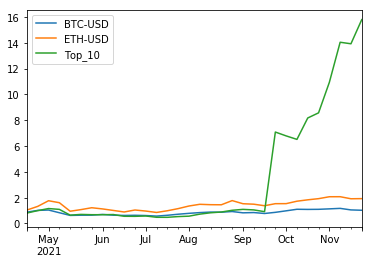

In [61]:
%matplotlib inline

df_results.plot()

In [28]:
data = yf.download('BTC-USD', interval='1wk', start="2017-01-01", end="2021-12-01")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-26,960.627014,1003.080017,947.236023,998.325012,998.325012,246910112
2017-01-02,998.617004,1191.099976,823.556030,911.198975,911.198975,2052639008
2017-01-09,913.244019,919.447998,755.755981,821.797974,821.797974,1123984880
2017-01-16,821.783020,937.525024,820.270996,924.672974,924.672974,883611600
2017-01-23,925.499023,928.265991,891.687012,919.495972,919.495972,693151900
...,...,...,...,...,...,...
2021-11-01,61320.449219,64242.792969,59695.183594,63326.988281,63326.988281,227064607869
2021-11-08,63344.066406,68789.625000,62333.914062,65466.839844,65466.839844,259776276520
2021-11-15,65521.289062,66281.570312,55705.179688,58730.476562,58730.476562,253419951009


In [188]:
(57000-998)/998


56.11422845691383

In [184]:
pd.read_csv('data/ETH-USD.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-26,8.151150,8.471230,7.909380,8.172570,8.172570,23798500
1,2017-01-02,8.170870,11.890900,8.054410,10.289800,10.289800,200115400
2,2017-01-09,10.313800,10.783800,9.175580,9.904260,9.904260,153865600
3,2017-01-16,9.883530,10.977800,9.544620,10.703200,10.703200,84074070
4,2017-01-23,10.709900,10.844700,10.429300,10.484000,10.484000,49270830
...,...,...,...,...,...,...,...
253,2021-11-01,4288.217285,4664.910156,4160.966797,4620.554688,4620.554688,121471900421
254,2021-11-08,4619.649414,4859.502930,4485.093262,4626.358887,4626.358887,125752889256
255,2021-11-15,4627.090820,4891.704590,3959.227783,4269.732910,4269.732910,137429429244
256,2021-11-22,4266.509277,4550.842285,3933.506592,4294.453613,4294.453613,141179727084


In [185]:
(4631-8)/8

577.875

In [ ]:
# Next steps
# Meer coin data inlezen (aanpassen van get_top_crypto functie of data pakken van Coinmarketcap)
# Wekelijkse picks filteren op ranking van marketcap van die maand. 
# Als de top1 picks van die week in de top 10 vd maand zitten, dan mag het geselecteerd worden. 
# Anders niet en schuiven we op naar de volgende token.
# Code zo algemeen mogelijk zodat we dit later ook kunnen testen voor top 200 etc.